In [26]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

conn = sqlite3.connect('FPA_FOD_20170508.sqlite')

In [27]:
df = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE, DISCOVERY_TIME, CONT_DATE, CONT_TIME, FIPS_NAME, FIRE_SIZE FROM 'Fires' where FIRE_YEAR >= 2009 order by DISCOVERY_DATE desc", conn)

In [28]:
df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE
0,2015,Miscellaneous,33.267310,-111.997810,AZ,2457387.5,0145,2457387.5,0200,None,0.1
1,2015,Arson,35.081190,-108.782890,NM,2457387.5,1645,2457387.5,1710,None,0.3
2,2015,Fireworks,26.596500,-81.739600,FL,2457387.5,2140,2457387.5,2239,Lee,1.0
3,2015,Debris Burning,31.658725,-97.473990,TX,2457387.5,None,NaN,None,Bosque,0.1
4,2015,Debris Burning,33.295893,-96.734075,TX,2457387.5,None,NaN,None,Collin,1.0


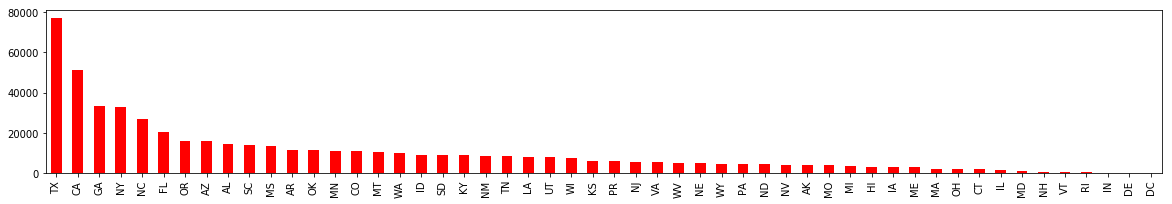

In [41]:
df["STATE"].value_counts().plot(kind='bar',color='red', figsize=(20,3))

plt.show()

In [45]:
state_df=df.loc[(df["STATE"]=="TX") |(df["STATE"]=="CA") | (df["STATE"]=="GA") | (df["STATE"]=="NY") | (df["STATE"]=="NC"),:] 

In [47]:
state_df

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE
3,2015,Debris Burning,31.658725,-97.473990,TX,2457387.5,None,NaN,None,Bosque,0.10
4,2015,Debris Burning,33.295893,-96.734075,TX,2457387.5,None,NaN,None,Collin,1.00
5,2015,Debris Burning,32.439411,-94.947366,TX,2457387.5,None,NaN,None,Gregg,0.25
6,2015,Debris Burning,32.116021,-96.325207,TX,2457387.5,None,NaN,None,Navarro,0.30
7,2015,Arson,31.484142,-82.813569,GA,2457387.5,1446,2457387.5,1451,Coffee,0.01
12,2015,Miscellaneous,34.244730,-102.828169,TX,2457387.5,None,NaN,None,Bailey,0.25
18,2015,Debris Burning,36.536611,-119.556721,CA,2457387.5,1751,NaN,None,Fresno,0.10
19,2015,Missing/Undefined,32.701123,-117.007382,CA,2457387.5,1816,NaN,None,San Diego,0.10
20,2015,Missing/Undefined,35.050000,-120.166666,CA,2457387.5,1723,NaN,None,Santa Barbara,0.01
21,2015,Arson,39.173027,-121.057377,CA,2457387.5,2132,2457387.5,2139,Nevada,0.01


In [53]:
weather_df=df["STATE"].unique()
weather_df
states=np.array(weather_df).tolist()
years= [2009,2010,2011,2012,2013,2014,2015]

In [60]:
key= "04e2cced184a450181130334171512" 
url= "http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=" +key     
query= url + "&q=New+York" +  "&date=2009-01-01" + "&enddate=2009-12-31"+ "&format=json"

In [61]:
print(query)

http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=04e2cced184a450181130334171512&q=New+York&date=2009-01-01&enddate=2009-12-31&format=json
